In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import nibabel as nib

In [11]:
class Clockwise:
    def __init__(self, dx = -1, dy = 0):
        self.directions = [[0, 1], [-1, 0], [0, -1], [1, 0]]
        if dx == 1:
            self.idx = 3
        elif dx == -1:
            self.idx = 1
        elif dy == 1:
            self.idx = 0
        else:
            self.idx = 2
    
    def next(self):
        self.idx = (self.idx + 1)%4
        return self
    
    def prev(self):
        self.idx = (self.idx - 1)%4
        return self
    
    def get_direction(self):
        return self.directions[self.idx]


In [12]:
def get_boundary(i, j, mat, left_boundary):
    d = Clockwise()
    x, y = [i], [j]
    while (i, j) not in left_boundary:
        d.prev()
        for _ in range(4):
            dx, dy = d.get_direction()
            ii = i + dx
            jj = j + dy
            if mat[ii][jj] != 0:
                if dy == 1:
                    left_boundary.add((i, j))
                d.next()
            else:
                i = ii
                j = jj
                x.append(i)
                y.append(j)
                break
    return (x, y)

In [13]:
def contours(mat):
    # assuming that the first column of mat are all zero.
    left_boundary = set()
    res = list()
    rows = np.where(np.any(mat, axis = 1))[0]
    for i in rows:
        for j in range(len(mat[i])):
            if mat[i][j] == 1 and mat[i][j-1] == 0 and (i, j-1) not in left_boundary:
                res.append(get_boundary(i, j-1, mat, left_boundary))
    return res

In [3]:
path = "/Users/kejin/Dropbox/brain_data/nipy/R_LGN_Median_in_T1.nii.gz"
img = nib.load(path)

In [5]:
img_data = img.get_data()

In [6]:
img_data.shape

(160, 185, 200)

In [7]:
brain_path = "/Users/kejin/Dropbox/brain_data/nipy/pdinT1_brain.nii.gz"
brain_img = nib.load(brain_path)

In [8]:
brain_img_data = brain_img.get_data()

In [9]:
brain_img_data.shape

(160, 185, 200)

In [14]:
def interval(mat, axis, margin = 10):
    r = np.where(np.amax(mat, axis = axis))[0]
    return max(0, r[0] - margin), r[-1] + margin

In [15]:
M = [np.amax(p) for p in img_data]
np.where(M)

(array([ 95,  96,  97,  98,  99, 100, 101, 102]),)

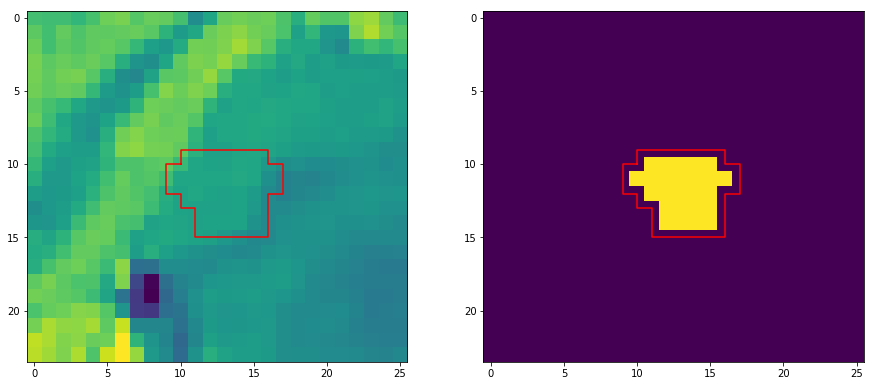

In [21]:
# Only needs to change value of k at the first line.
# the value of k should be one of the values returned in the cell above.
k = 98
mat = img_data[k]
lines = contours(mat)
fig = plt.figure()
fig.set_size_inches(15, 15)
ax = fig.add_subplot(1, 2, 1)
rbeg, rend = interval(img_data[k], 1)
cbeg, cend = interval(img_data[k], 0)
ax.imshow(brain_img_data[k, rbeg:rend, cbeg:cend])
bx = fig.add_subplot(1, 2, 2)
bx.imshow(img_data[k, rbeg:rend, cbeg:cend])
for x, y in lines:
    ax.plot(np.array(y) - cbeg, np.array(x) - rbeg, 'r-')
    bx.plot(np.array(y) - cbeg, np.array(x) - rbeg, 'r-')